In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x_train = pd.read_csv("Diabetes_XTrain.csv")
y_train = pd.read_csv("Diabetes_YTrain.csv")
x_test = pd.read_csv("Diabetes_Xtest.csv")

In [3]:
x_train.shape,y_train.shape,x_test.shape

((576, 8), (576, 1), (192, 8))

In [4]:
x = x_train.values
y = y_train.values
xt = x_test.values

In [5]:
u = x.mean(axis=0)
std = x.std(axis=0)
x = (x-u)/std
xt = (xt-u)/std

In [6]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    hi = hypothesis(X,theta)
    e = -1.0 * np.mean((y*np.log(hi)) + ((1-y)*np.log(1-hi)))
    return e

def gradient(X,y,theta):
    hi = hypothesis(X,theta)
    grad = np.dot(X.T,(hi-y))
    return grad/X.shape[0]

def gradient_descent(X,y,lr=0.5,epochs=300):
    n = X.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    for i in range(epochs):
        err = error(X,y,theta)
        error_list.append(err)
        grad = gradient(X,y,theta)
        theta = theta - lr*grad
    return theta, error_list

In [7]:
ones = np.ones((x.shape[0],1))
x_ntrain = np.hstack((ones,x))
Y_train = y.reshape((-1,1))

In [8]:
theta,error_list = gradient_descent(x_ntrain,Y_train)

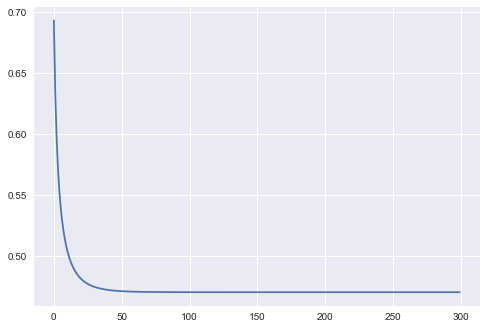

In [9]:
plt.style.use('seaborn')
plt.plot(error_list)
plt.show()

In [10]:
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    #print(output[:5:])
    output = output.astype('int')
    return output
XT_pred = predict(x_ntrain,theta)